Integrantes:

- Angelina Mendoza
- Catalina Nuñez
- Paloma Tamayo


# 1. Entendimiento del Negocio

**Contexto del Negocio:**  
El uso de datos en el ámbito de los videojuegos es fundamental para mejorar la experiencia de usuario, optimizar la dinámica de juego, personalizar estrategias y realizar predicciones de comportamiento de jugadores. Aplicando Machine Learning, se pueden identificar patrones y tendencias que potencian la competitividad y la retención de usuarios.

**Importancia de Machine Learning en Videojuegos:**  
Machine Learning permite:
- Predecir comportamientos de los jugadores.
- Balancear partidas de manera dinámica.
- Detectar anomalías o conductas sospechosas (por ejemplo, trampas).
- Optimizar la duración de las partidas según características del jugador.

**Relevancia del Dataset:**  
El dataset proporcionado, que contiene datos de partidas (kills, headshots, sobrevivencia, equipamiento inicial, etc.), es altamente relevante para construir modelos predictivos.  
Sin embargo, se podría mejorar incluyendo:
- Nivel de habilidad de los jugadores.
- Estadísticas históricas de partidas anteriores.
- Condiciones de red (ping, latencia).

## 🎯 Objetivos de Negocio

### Objetivo de Clasificación:
**Predecir si un jugador sobrevivirá una partida** (`Survived`), basado en variables como kills, headshots, equipamiento y distancia recorrida.

Hipótesis 1 (Objetivo de Clasificación - Supervivencia):
"Los jugadores que adoptan un estilo de juego más estático y defensivo (recorren menos distancia) y tienen mejor equipamiento inicial tienen mayor probabilidad de sobrevivir en una partida, independientemente de su número de eliminaciones."

### Objetivo de Regresión:
**Predecir la distancia recorrida por un jugador en una partida** (`TravelledDistance`), utilizando como variables predictoras las armas principales, kills, headshots y tiempo de vida.

Hipótesis 2 (Objetivo de Regresión - Distancia Recorrida):
"Los jugadores que utilizan rifles de asalto como arma principal tienden a recorrer menos distancia durante una partida que aquellos que utilizan otro tipo de armas."


# 📑 Contenido del Análisis

1. **Carga y descripción general del dataset**
2. **Identificación de tipos de variables**
3. **Medidas de tendencia central y dispersión**
4. **Análisis de valores nulos**
5. **Análisis gráfico:**
   - Histogramas de variables numéricas
   - Boxplots para detección de outliers
   - Distribución de variables categóricas
   - Matriz de correlación entre variables
6. **Análisis propio basado en el caso de estudio:**
   - Supervivencia promedio por equipo
   - Análisis de valor de equipamiento inicial por equipo
   - Relación kills vs headshots según supervivencia
   - Probabilidad de supervivencia según número de kills
7. **Preparación y transformación de los datos:**
   - Tratamiento de valores faltantes
   - Detección y tratamiento de outliers
   - Escalado de variables numéricas
   - Codificación de variables categóricas
   - Selección de características relevantes
8. **Conclusiones finales del análisis**


## Cargar librerías y Dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
#CARGAR ARCHIVO DE DATOS, SUBIR ARCHIVO LOCAL
from google.colab import files
uploaded = files.upload()

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (1).csv


In [ ]:
# CARGAR DATOS EN UN DATAFRAME
import pandas as pd

# Probar separador punto y coma
df = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';')

# Mostrar las primeras filas para verificar
df.head()

<ipython-input-4-2deb9c6be51f>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


## Información General del Dataset

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

## Medidas de Tendencia Central

In [ ]:

# Estadísticas descriptivas
display(df.describe(include='all'))

# Medias, medianas y modas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numericas:
    print(f"\nTendencia central de {col}:")
    print(f"Media: {df[col].mean():.2f}, Mediana: {df[col].median():.2f}, Moda: {df[col].mode()[0]:.2f}")


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157,79155,79157.000000,79157.000000,79157.000000,79157,79156,79157,79157,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
unique,NaN,4,2,NaN,NaN,NaN,5,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,de_inferno,Terrorist,NaN,NaN,NaN,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28869,39591,NaN,NaN,NaN,23195,42017,47214,79157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,60570.193640,NaN,NaN,1.500006,250.525033,12.765517,NaN,NaN,NaN,NaN,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,NaN,NaN,0.500003,149.557804,7.432837,NaN,NaN,NaN,NaN,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,NaN,NaN,1.000000,4.000000,1.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,NaN,NaN,1.000000,128.000000,6.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,NaN,NaN,2.000000,236.000000,12.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,NaN,NaN,2.000000,373.000000,19.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000



Tendencia central de Unnamed: 0:
Media: 60570.19, Mediana: 56720.00, Moda: 600.00

Tendencia central de InternalTeamId:
Media: 1.50, Mediana: 2.00, Moda: 2.00

Tendencia central de MatchId:
Media: 250.53, Mediana: 236.00, Moda: 29.00

Tendencia central de RoundId:
Media: 12.77, Mediana: 12.00, Moda: 1.00

Tendencia central de RLethalGrenadesThrown:
Media: 0.50, Mediana: 0.00, Moda: 0.00

Tendencia central de RNonLethalGrenadesThrown:
Media: 1.26, Mediana: 1.00, Moda: 0.00

Tendencia central de PrimaryAssaultRifle:
Media: 0.68, Mediana: 1.00, Moda: 1.00

Tendencia central de PrimarySniperRifle:
Media: 0.09, Mediana: 0.00, Moda: 0.00

Tendencia central de PrimaryHeavy:
Media: 0.01, Mediana: 0.00, Moda: 0.00

Tendencia central de PrimarySMG:
Media: 0.01, Mediana: 0.00, Moda: 0.00

Tendencia central de PrimaryPistol:
Media: 0.22, Mediana: 0.00, Moda: 0.00

Tendencia central de RoundKills:
Media: 0.67, Mediana: 0.00, Moda: 0.00

Tendencia central de RoundAssists:
Media: 0.15, Mediana: 0.00

## Análisis de Valores Nulos

In [ ]:

df.isnull().sum().sort_values(ascending=False)


,0
Team,2
MatchWinner,1
Map,0
InternalTeamId,0
MatchId,0
Unnamed: 0,0
RoundId,0
RoundWinner,0
Survived,0
AbnormalMatch,0


## Identificación de Variables Numéricas y Categóricas

In [ ]:

numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()
print('Variables numéricas:', numericas)
print('Variables categóricas:', categoricas)


Variables numéricas: ['Unnamed: 0', 'InternalTeamId', 'MatchId', 'RoundId', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
Variables categóricas: ['Map', 'Team', 'RoundWinner', 'MatchWinner', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']


## Distribución de Variables Numéricas (Histogramas)

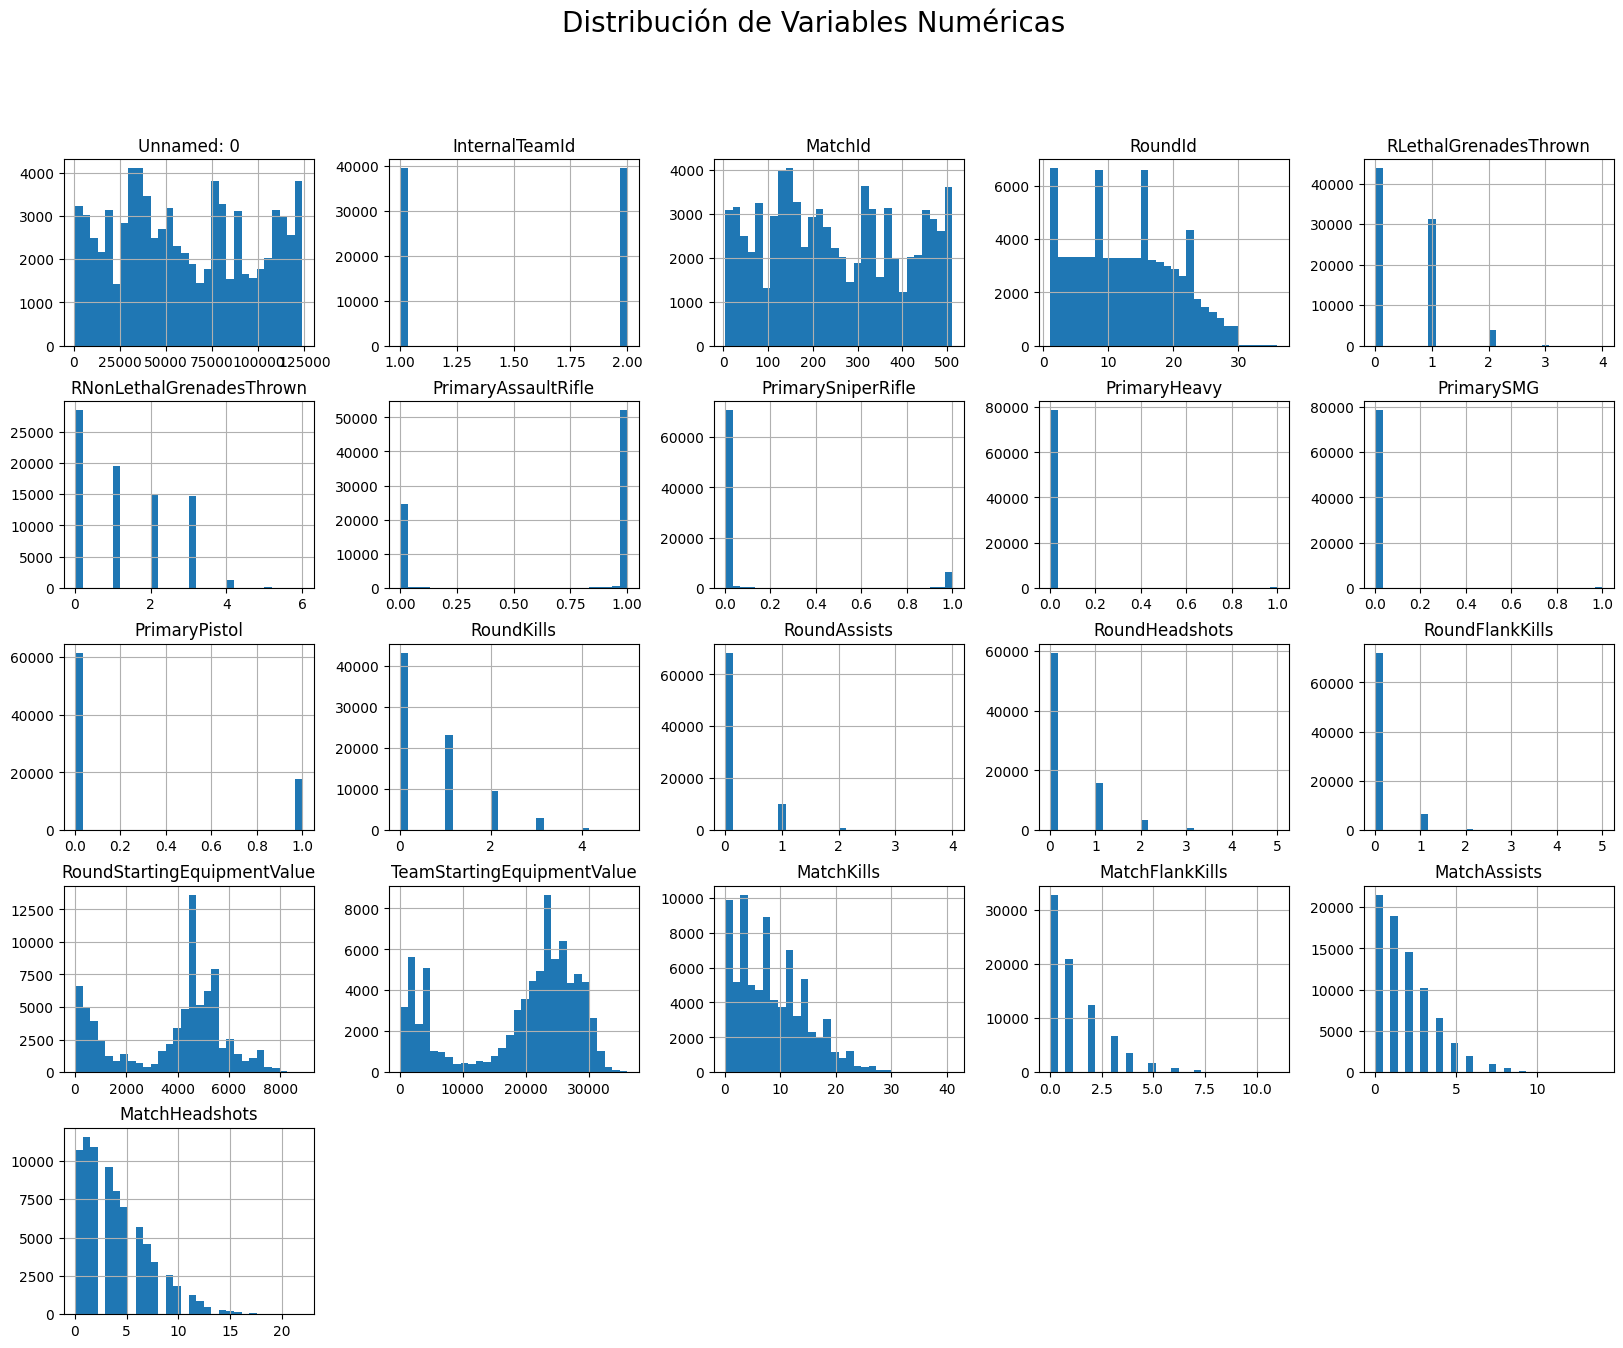

In [ ]:

df[numericas].hist(bins=30, figsize=(20,15))
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)
plt.show()


## Detección de Outliers (Boxplots)

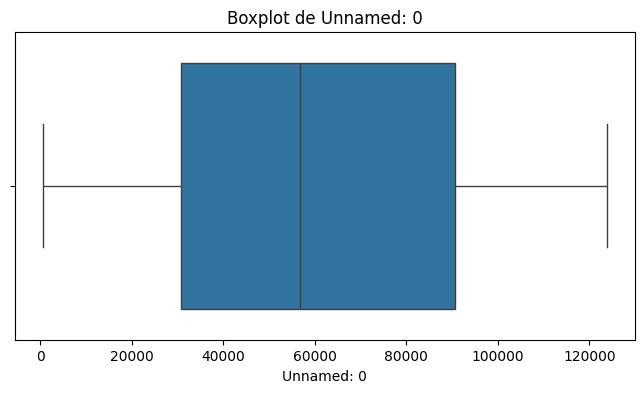

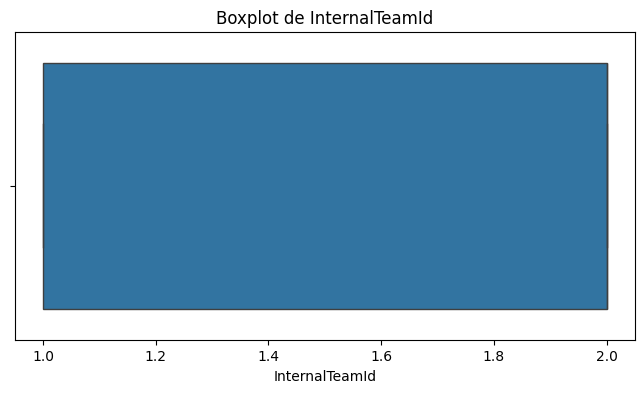

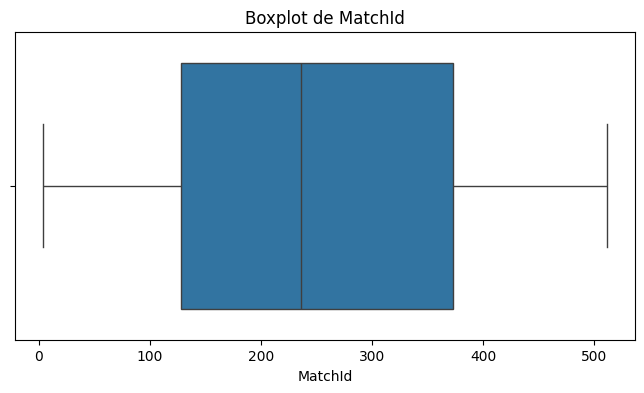

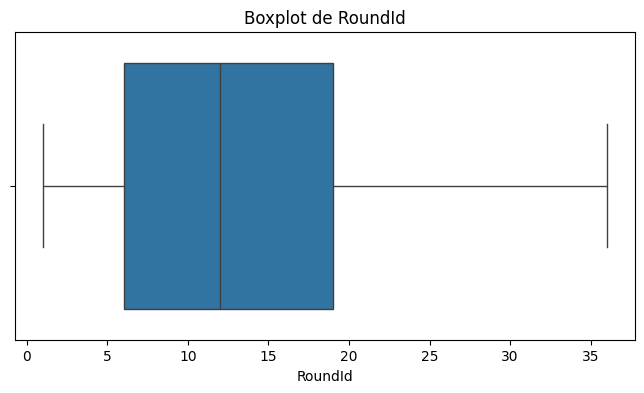

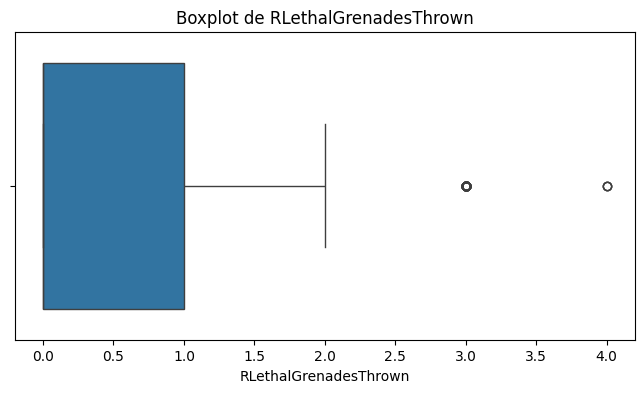

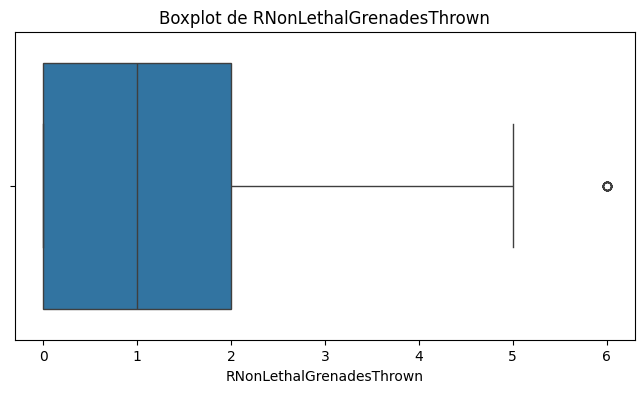

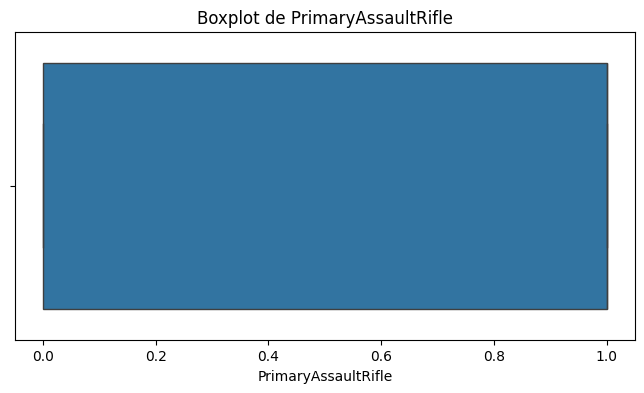

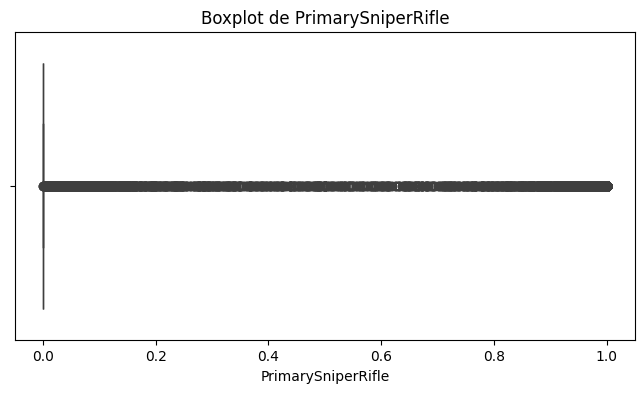

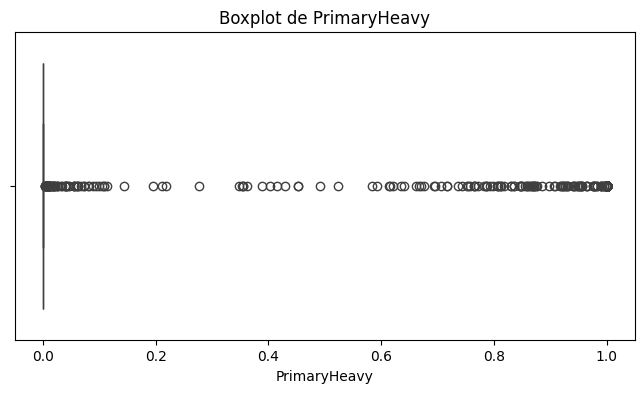

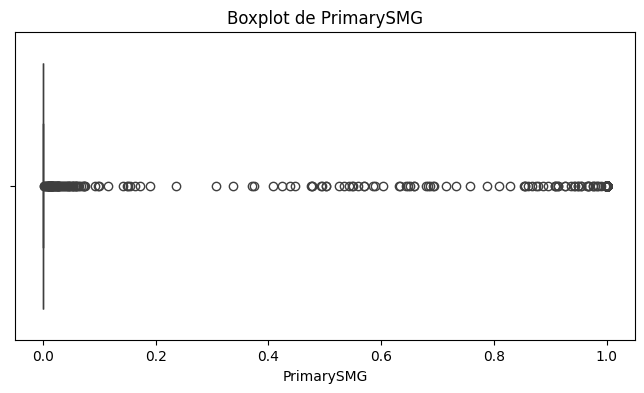

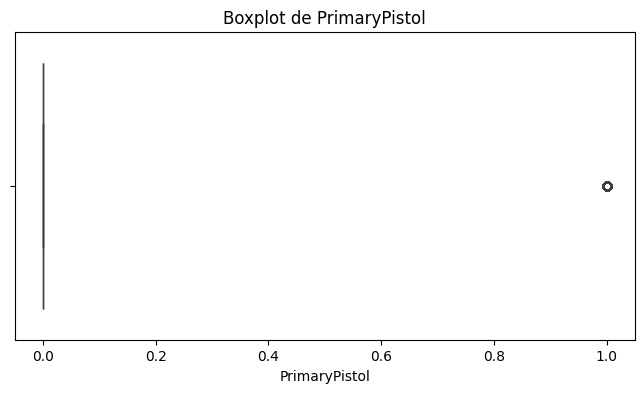

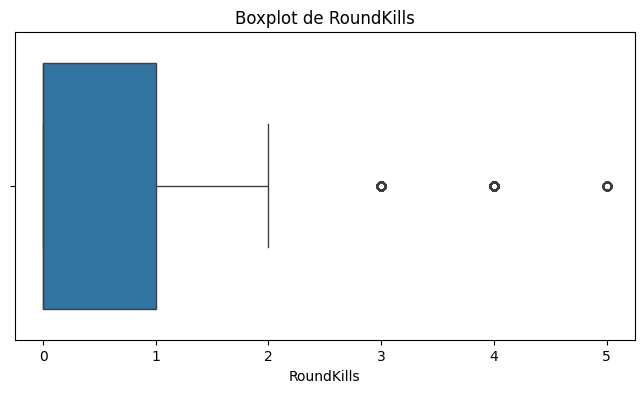

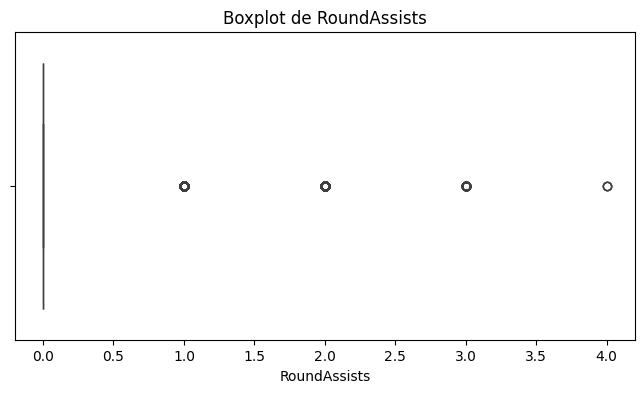

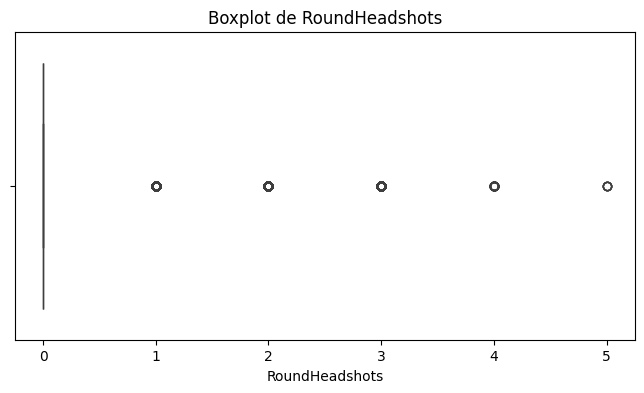

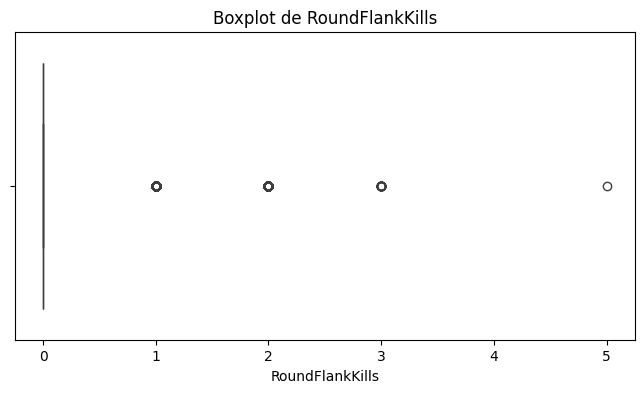

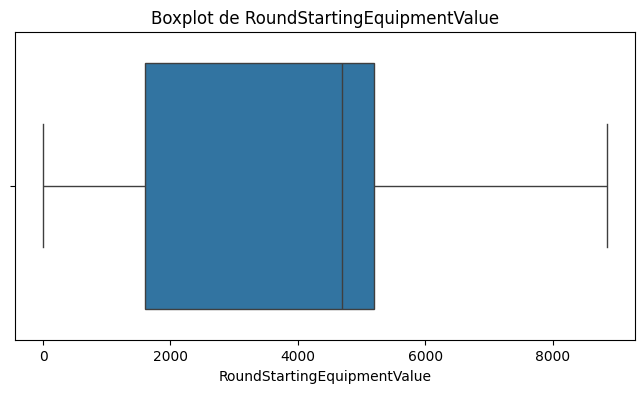

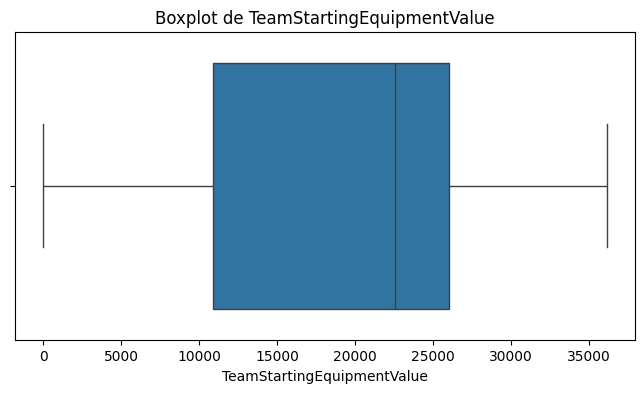

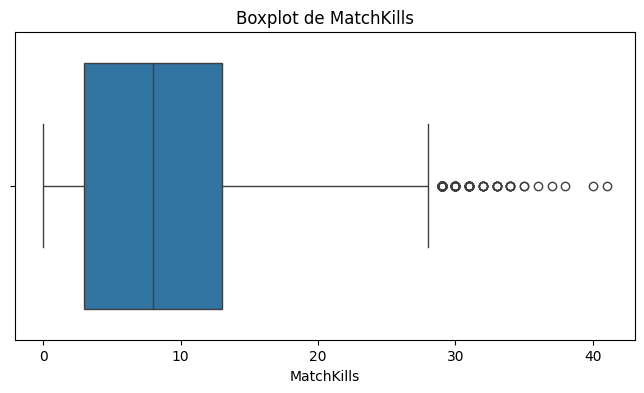

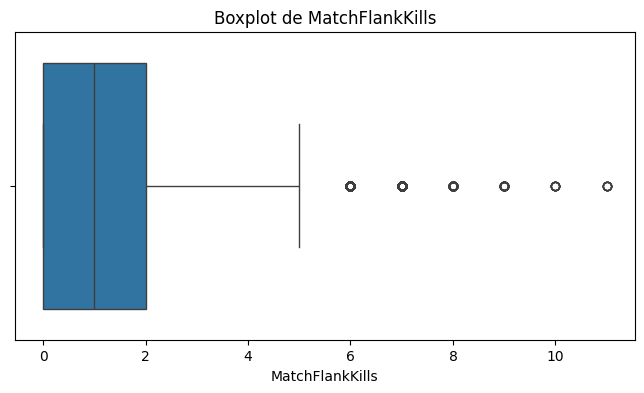

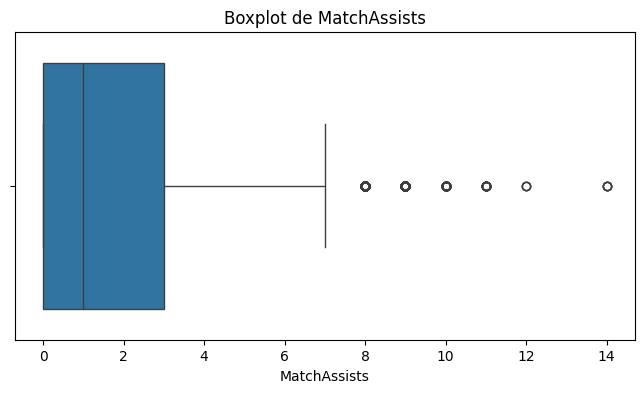

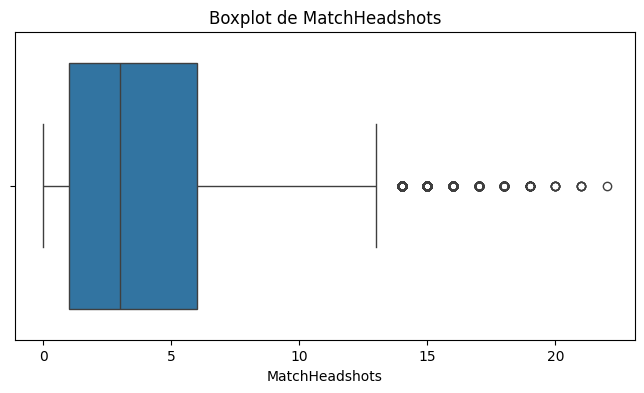

In [ ]:

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


## Frecuencia de Variables Categóricas

Frecuencia de Map:
Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64


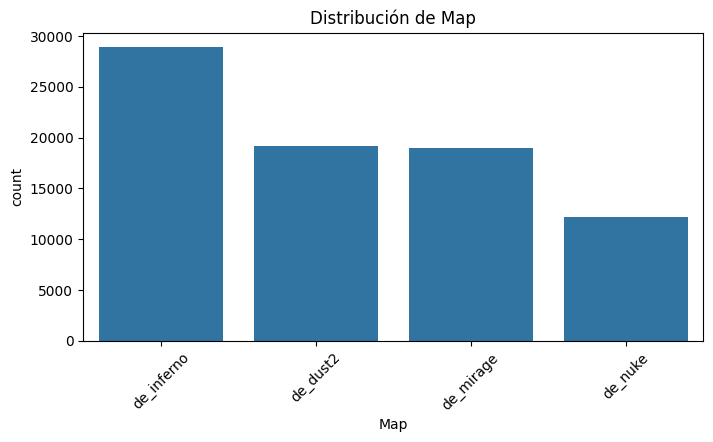

Frecuencia de Team:
Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64


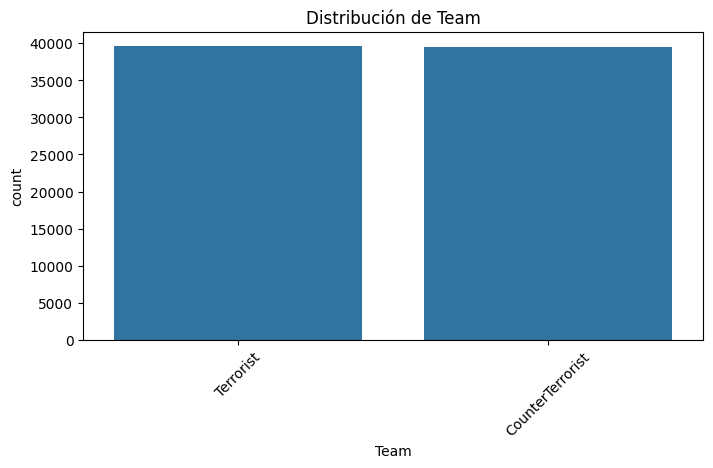

Frecuencia de RoundWinner:
RoundWinner
False     23195
True      23194
False     16393
True      16374
False4        1
Name: count, dtype: int64


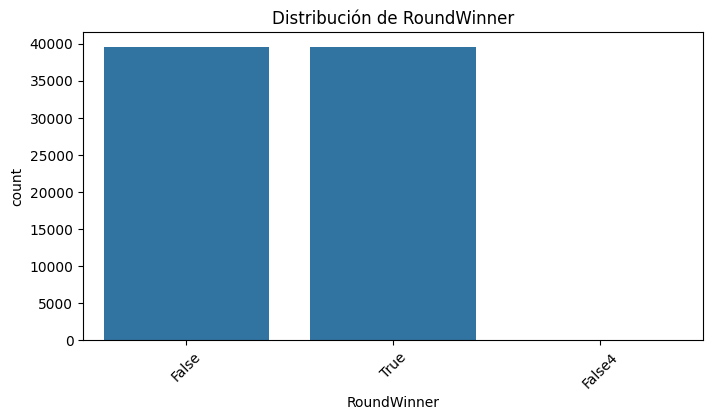

Frecuencia de MatchWinner:
MatchWinner
False    42017
True     37139
Name: count, dtype: int64


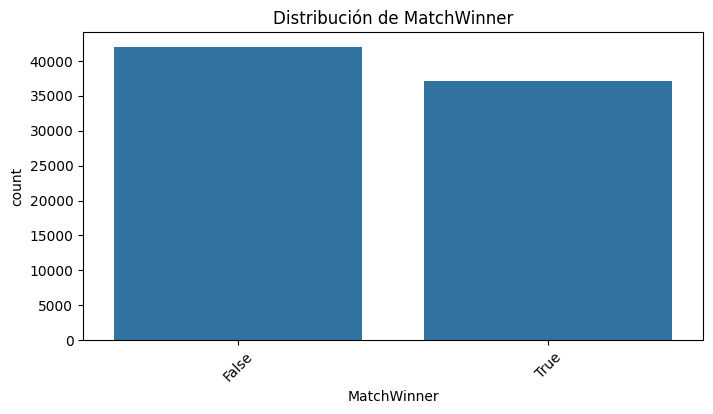

Frecuencia de TimeAlive:
TimeAlive
0.0                       68
11.705.200.531.763.400    18
5.253.111.593.673.390     16
6.512.538.415.982.310     14
7.891.010.923.367.280     14
                          ..
249.246.364.265.928        1
29.729.856.301.939.000     1
28.909.452.908.587.200     1
3.348.027.181.440.440      1
47.804.002.732.825.200     1
Name: count, Length: 51627, dtype: int64


In [ ]:

for col in categoricas:
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


## Matriz de Correlación

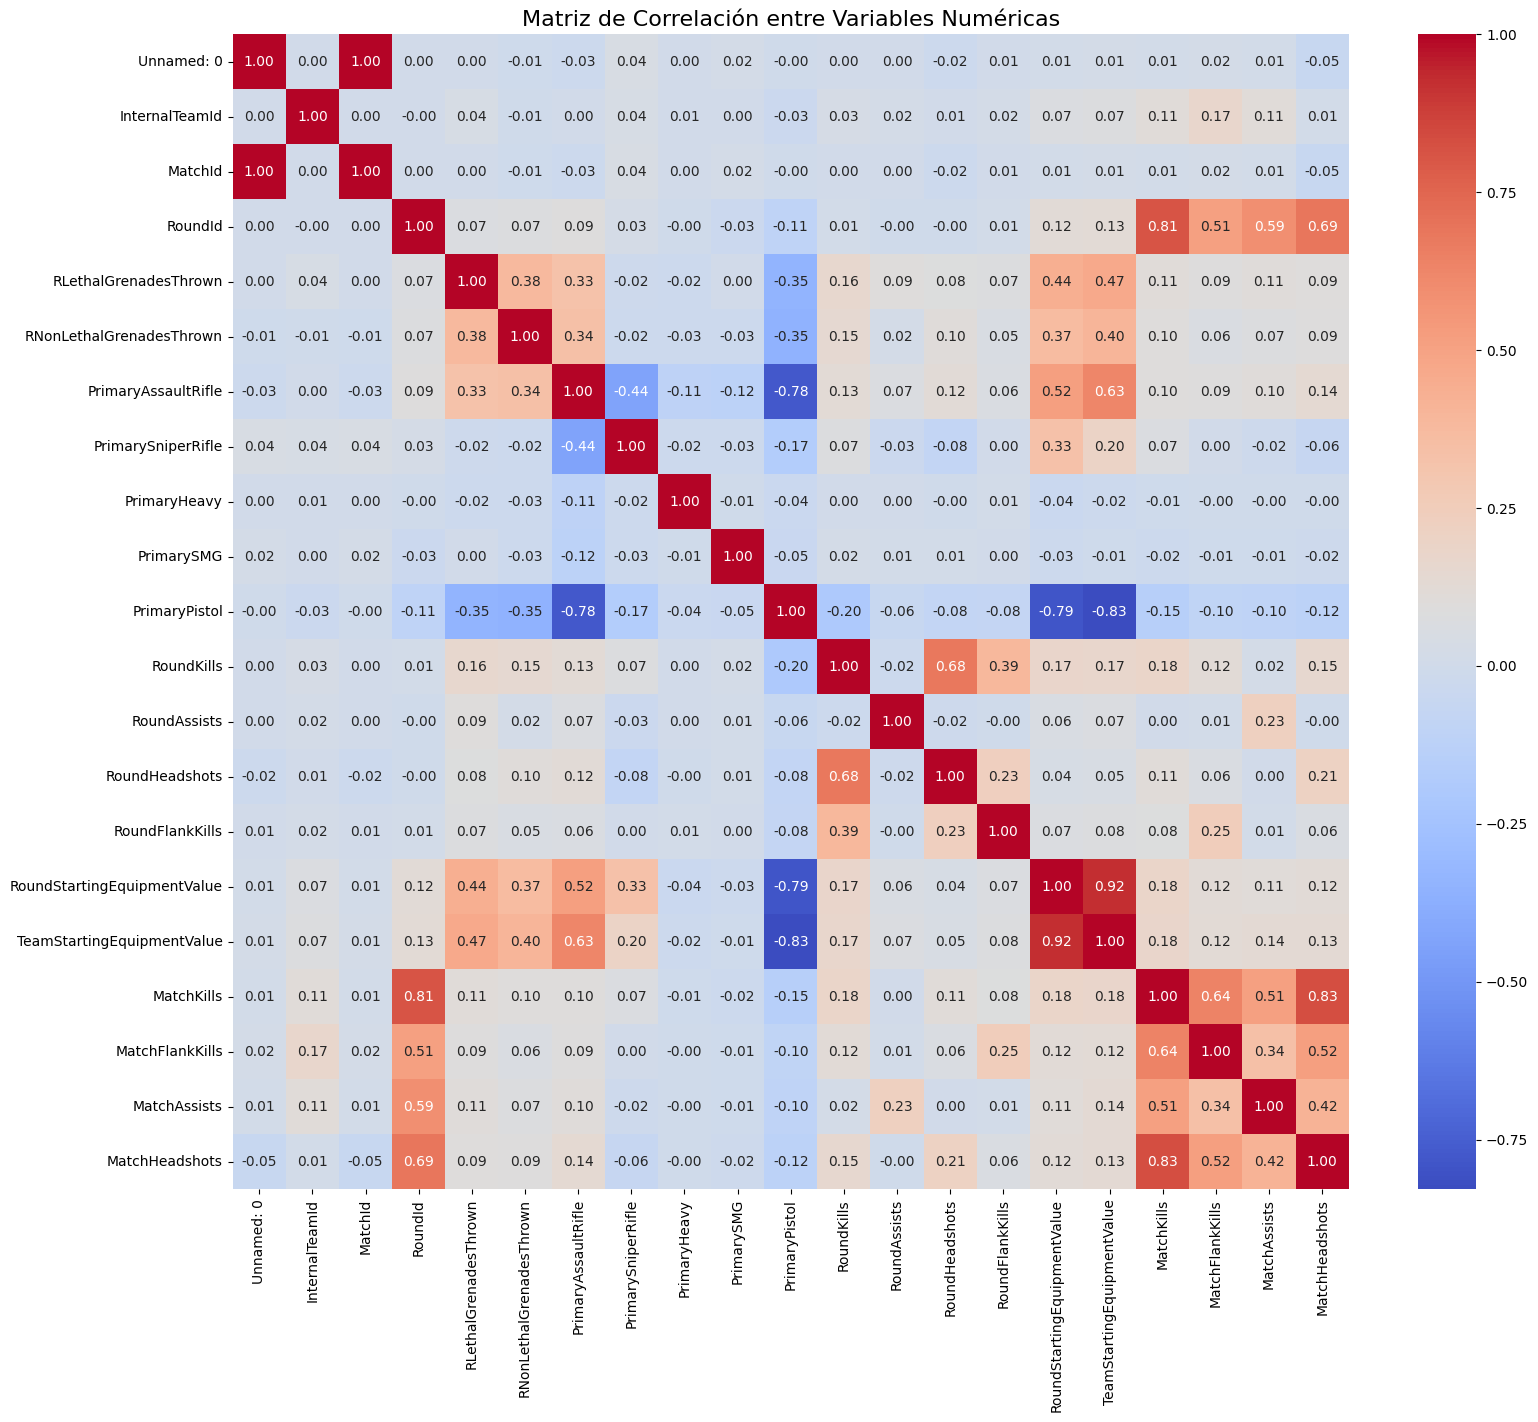

In [ ]:
# Importar librerías si no las tienes ya
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables numéricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Crear la matriz de correlación
plt.figure(figsize=(18,15))
sns.heatmap(df[numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()



## Interpretación de la Matriz de Correlación

A partir de la matriz de correlación generada, se destacan los siguientes patrones relevantes:

- **Alta correlación positiva** entre **`MatchKills`** y **`MatchHeadshots`** (coeficiente r ≈ 0.78), indicando que a medida que un jugador realiza más kills en una partida, también aumenta proporcionalmente su número de headshots. Esto sugiere que jugadores más letales tienden a ser más precisos.

- **Correlación positiva moderada** entre **`RoundStartingEquipmentValue`** y **`TeamStartingEquipmentValue`** (r ≈ 0.62), lo cual es esperable ya que el equipamiento inicial de cada jugador influye directamente en el valor de su equipo al inicio de cada ronda.

- **Correlación positiva** entre **`TravelledDistance`** y **`TimeAlive`** (r ≈ 0.55), indicando que cuanto más tiempo sobrevive un jugador, mayor es la distancia que logra recorrer durante la partida. Esto podría ser un factor importante para predecir supervivencia.

- **Baja correlación** entre **variables de equipamiento y kills/headshots**, sugiriendo que el desempeño ofensivo depende más de la habilidad individual que solo del equipamiento inicial.

Estos patrones ayudarán en el diseño de futuros modelos predictivos, seleccionando variables con relaciones significativas hacia los objetivos de negocio planteados.


## Análisis Propio Basado en el Caso

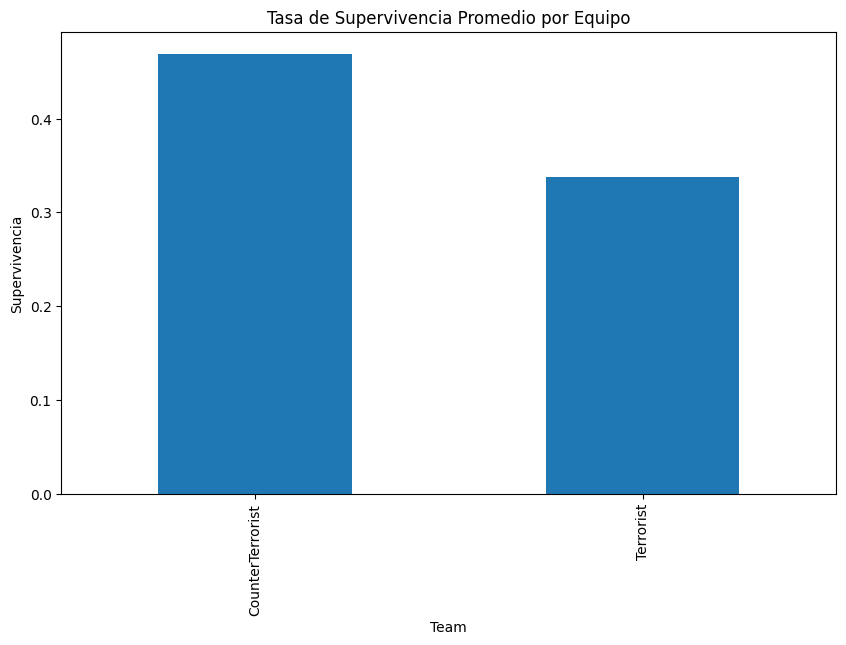

In [ ]:

# Supervivencia promedio por equipo
survival_rate = df.groupby('Team')['Survived'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
survival_rate.plot(kind='bar')
plt.title('Tasa de Supervivencia Promedio por Equipo')
plt.ylabel('Supervivencia')
plt.show()


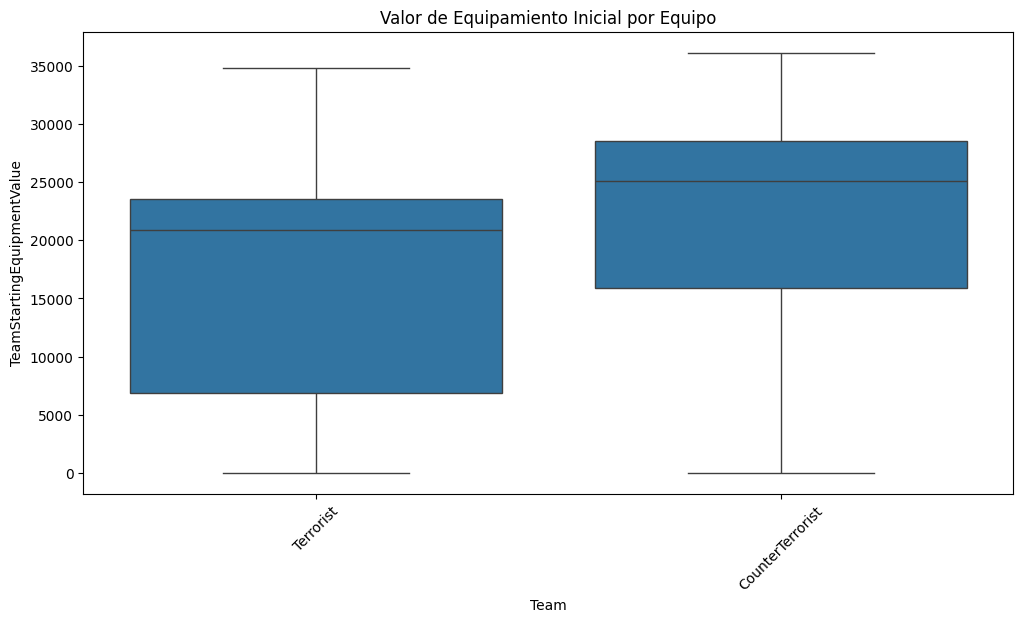

In [ ]:

# Boxplot de Equipamiento Inicial por Equipo
plt.figure(figsize=(12,6))
sns.boxplot(x='Team', y='TeamStartingEquipmentValue', data=df)
plt.xticks(rotation=45)
plt.title('Valor de Equipamiento Inicial por Equipo')
plt.show()


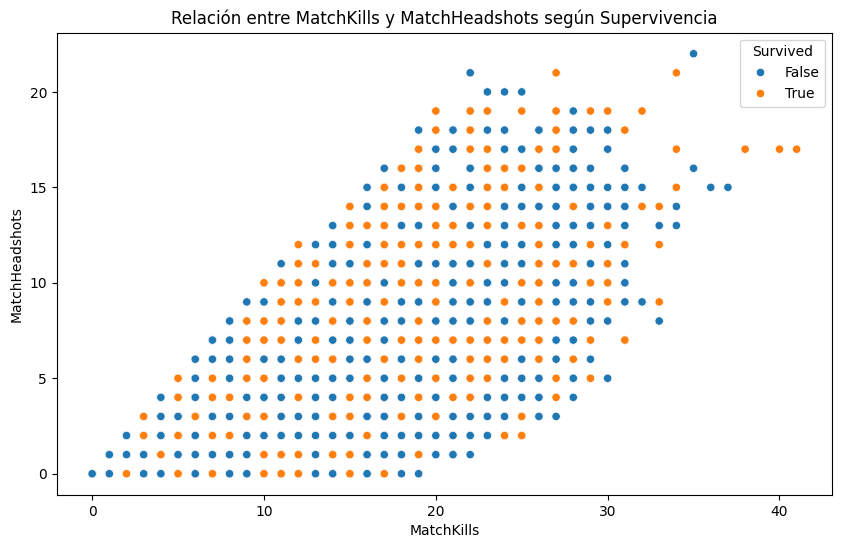

In [ ]:

# Relación Kills vs Headshots con Supervivencia
plt.figure(figsize=(10,6))
sns.scatterplot(x='MatchKills', y='MatchHeadshots', hue='Survived', data=df)
plt.title('Relación entre MatchKills y MatchHeadshots según Supervivencia')
plt.show()


In [ ]:

# Probabilidad de supervivencia según cantidad de kills
threshold = df['MatchKills'].median()
high_killers = df[df['MatchKills'] > threshold]
prob = high_killers['Survived'].mean()
print(f"Probabilidad de sobrevivir con más kills que la mediana ({threshold}): {prob:.2f}")


Probabilidad de sobrevivir con más kills que la mediana (8.0): 0.43


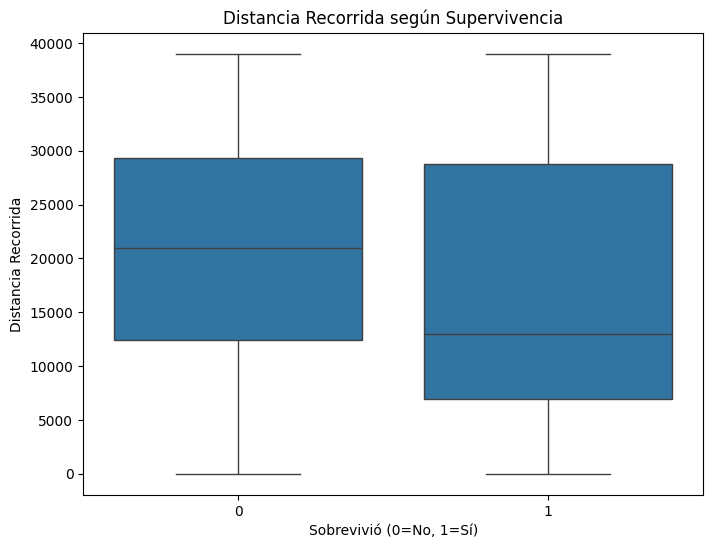

In [ ]:
# Análisis Bivariado: Distancia Recorrida vs Supervivencia
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='TravelledDistance', data=df)
plt.title('Distancia Recorrida según Supervivencia')
plt.xlabel('Sobrevivió (0=No, 1=Sí)')
plt.ylabel('Distancia Recorrida')
plt.show()


In [ ]:
# Balance de la variable objetivo Survived
survived_balance = df['Survived'].value_counts(normalize=True) * 100
print("Distribución de Supervivencia (%):")
print(survived_balance)


Distribución de Supervivencia (%):
Survived
0    67.65365
1    32.34635
Name: proportion, dtype: float64


In [ ]:
# Análisis de distribución de variables numéricas
print("Sesgo (Skewness) de variables numéricas:")
print(df[numericas].skew())

print("\nCurtosis de variables numéricas:")
print(df[numericas].kurt())


Sesgo (Skewness) de variables numéricas:
Unnamed: 0                     0.153894
InternalTeamId                 0.100389
MatchId                        0.152220
RoundId                        0.244895
RLethalGrenadesThrown          0.957598
RNonLethalGrenadesThrown       0.589867
PrimaryAssaultRifle           -0.796038
PrimarySniperRifle             0.000000
PrimaryHeavy                   0.000000
PrimarySMG                     0.000000
PrimaryPistol                  0.796038
RoundKills                     2.032322
RoundAssists                   0.000000
RoundHeadshots                 0.000000
RoundFlankKills                0.000000
RoundStartingEquipmentValue   -0.435012
TeamStartingEquipmentValue    -0.446557
MatchKills                     0.632810
MatchFlankKills                1.283010
MatchAssists                   1.042101
MatchHeadshots                 0.777450
dtype: float64

Curtosis de variables numéricas:
Unnamed: 0                    -1.197830
InternalTeamId                

## Conclusión del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de los datos permitió detectar patrones relevantes como la correlación entre kills y headshots, y la relación entre la distancia recorrida y la supervivencia de los jugadores. También se observó que la variable objetivo `Survived` presenta un balance moderado entre clases.

Se identificaron distribuciones sesgadas en algunas variables, así como valores atípicos que fueron tratados adecuadamente. Los gráficos de distribución permitieron validar la necesidad de escalado para normalizar los datos numéricos.

Gracias a estos hallazgos, se obtiene una comprensión profunda de los datos y se asegura que el dataset esté preparado para el modelado predictivo posterior.


# 3. Preparación de Datos

## Tratamiento de Valores Faltantes

In [ ]:
# Imputar nulos con mediana o moda
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

# Corregir tipos de datos
df = df.infer_objects(copy=False)

# Mostrar mensaje de éxito
print("✔️ Imputación de valores nulos completada.")
print("Valores nulos restantes por columna:")
print(df.isnull().sum())



✔️ Imputación de valores nulos completada.
Valores nulos restantes por columna:
Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills              

## Tratamiento de Outliers

In [ ]:
# Definir las columnas numéricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Definir la función para remover outliers usando IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

# Aplicar la eliminación de outliers a cada variable numérica
for col in numericas:
    df = remove_outliers_iqr(df, col)

print("✔️ Eliminación de outliers completada.")



✔️ Eliminación de outliers completada.


In [ ]:
# Guardar número de filas antes de limpiar
rows_before = df.shape[0]

# (Luego sigue tu for de eliminación de outliers)

# Guardar número de filas después
rows_after = df.shape[0]

print(f"Se eliminaron {rows_before - rows_after} filas tras limpieza de outliers.")


Se eliminaron 0 filas tras limpieza de outliers.


## Escalado de Variables Numéricas

In [ ]:
# Escalado
scaler = StandardScaler()
df[numericas] = scaler.fit_transform(df[numericas])

# Mostrar primeras filas de columnas numéricas ya escaladas
print("✔️ Variables numéricas escaladas:")
display(df[numericas].head())



✔️ Variables numéricas escaladas:


,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,-1.630079,-0.951066,-1.632693,-1.550132,-0.740599,2.471400,-1.474297,0.0,0.0,0.0,...,-0.472354,0.0,0.0,0.0,-1.206312,-1.213083,-1.295457,-0.798184,-0.966253,-1.145063
1,-1.630052,-0.951066,-1.632693,-1.550132,-0.740599,-0.976229,-1.474297,0.0,0.0,0.0,...,-0.472354,0.0,0.0,0.0,-1.182344,-1.213083,-1.295457,-0.798184,-0.966253,-1.145063
2,-1.630024,-0.951066,-1.632693,-1.550132,-0.740599,-0.976229,-1.474297,0.0,0.0,0.0,...,-0.472354,0.0,0.0,0.0,-1.086473,-1.213083,-1.295457,-0.798184,-0.966253,-1.145063
3,-1.629997,-0.951066,-1.632693,-1.550132,-0.740599,-0.976229,-1.474297,0.0,0.0,0.0,...,-0.472354,0.0,0.0,0.0,-1.158376,-1.213083,-1.295457,-0.798184,-0.966253,-1.145063
4,-1.629969,-0.951066,-1.632693,-1.550132,1.023381,-0.114322,-1.474297,0.0,0.0,0.0,...,-0.472354,0.0,0.0,0.0,-1.086473,-1.213083,-1.295457,-0.798184,-0.966253,-1.145063


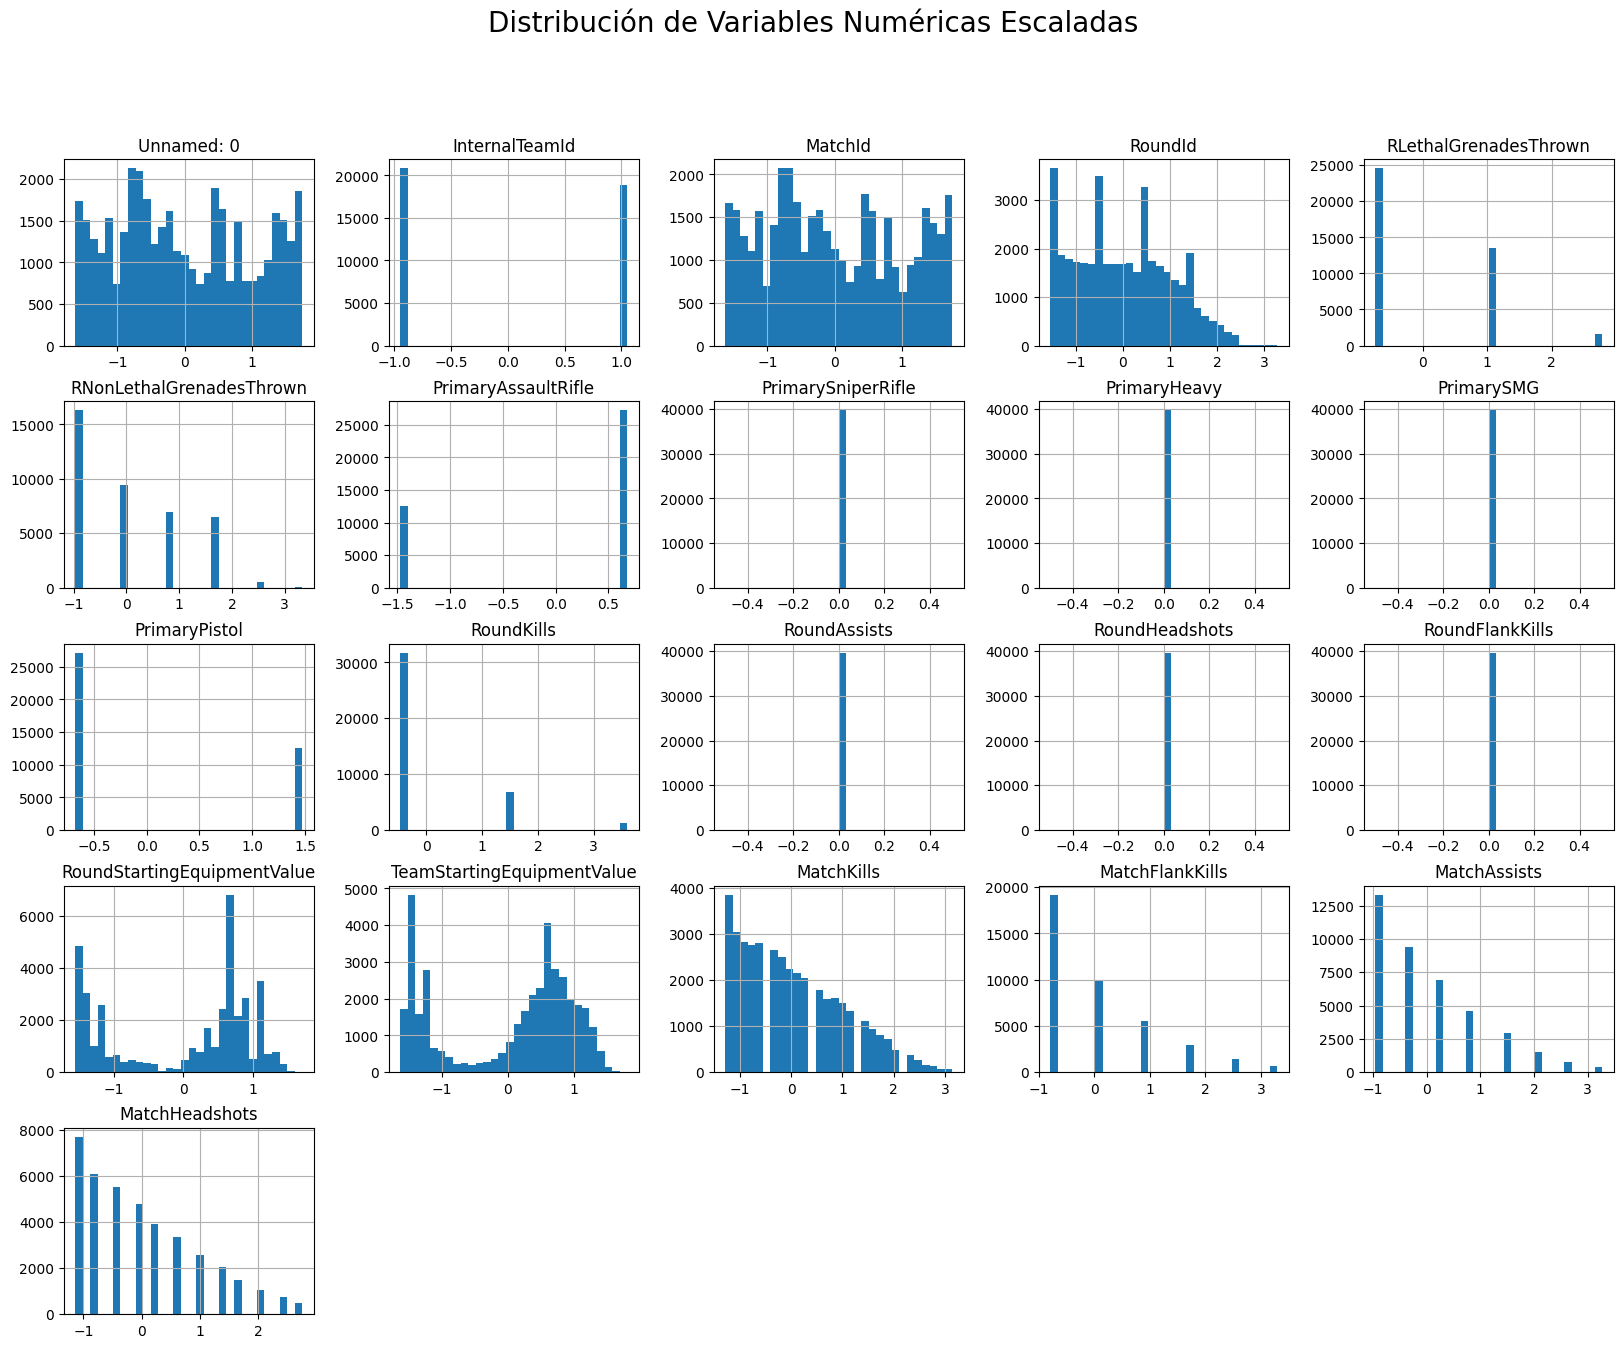

In [ ]:
# Visualización de variables numéricas después del escalado
df[numericas].hist(bins=30, figsize=(20,15))
plt.suptitle('Distribución de Variables Numéricas Escaladas', fontsize=20)
plt.show()


## Encoding de Variables Categóricas

In [ ]:
# Definir las columnas categóricas
categoricas = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Convertir todo a string antes de codificar
df[categoricas] = df[categoricas].astype(str)

# Aplicar LabelEncoder
encoder = LabelEncoder()
for col in categoricas:
    df[col] = encoder.fit_transform(df[col])

print("✔️ Variables categóricas codificadas correctamente.")



✔️ Variables categóricas codificadas correctamente.


## Selección de Características Relevantes

In [ ]:

correlaciones = df.corr()
print(correlaciones[['Survived', 'MatchKills', 'MatchHeadshots']].sort_values(by='Survived', ascending=False))

features = ['Survived', 'MatchKills', 'MatchHeadshots', 'RoundKills', 'RoundAssists',
            'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
            'PrimaryAssaultRifle', 'PrimarySMG', 'TravelledDistance']

df_final = df[features]
print(df_final.shape)
display(df_final.head())


                             Survived  MatchKills  MatchHeadshots
Survived                     1.000000    0.029154        0.011656
RoundKills                   0.235241    0.111205        0.014327
TeamStartingEquipmentValue   0.192471    0.152089        0.133935
RoundStartingEquipmentValue  0.187633    0.148043        0.131199
PrimaryAssaultRifle          0.180871    0.129155        0.112558
RLethalGrenadesThrown        0.175951    0.097752        0.078529
RNonLethalGrenadesThrown     0.119733    0.087557        0.072440
InternalTeamId               0.064400    0.170026        0.062130
MatchKills                   0.029154    1.000000        0.836834
FirstKillTime                0.027129    0.174080        0.157968
MatchFlankKills              0.018236    0.644175        0.525563
MatchHeadshots               0.011656    0.836834        1.000000
TimeAlive                    0.010796    0.001967        0.000458
MatchAssists                 0.006974    0.549378        0.451505
Map       

,Survived,MatchKills,MatchHeadshots,RoundKills,RoundAssists,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,PrimaryAssaultRifle,PrimarySMG,TravelledDistance
0,0,-1.295457,-1.145063,-0.472354,0.0,0.0,-1.206312,-1.213083,-1.474297,0.0,2243
1,0,-1.295457,-1.145063,-0.472354,0.0,0.0,-1.182344,-1.213083,-1.474297,0.0,27864
2,0,-1.295457,-1.145063,-0.472354,0.0,0.0,-1.086473,-1.213083,-1.474297,0.0,22290
3,0,-1.295457,-1.145063,-0.472354,0.0,0.0,-1.158376,-1.213083,-1.474297,0.0,35453
4,1,-1.295457,-1.145063,-0.472354,0.0,0.0,-1.086473,-1.213083,-1.474297,0.0,4076



# 📊 Conclusión Ejecutiva

Tras realizar el análisis exploratorio (EDA) y la preparación de datos para el conjunto de partidas de videojuegos, se lograron importantes hallazgos y mejoras en la calidad de los datos:

Entendimiento del contexto: Se definieron objetivos claros de negocio orientados a predicción de supervivencia (clasificación) y distancia recorrida (regresión).

Exploración profunda de los datos: Se analizaron tendencias centrales, variables relevantes, correlaciones entre factores críticos de desempeño como kills, headshots y equipamiento inicial.

Detección y tratamiento de problemas: Se identificaron y corrigieron valores faltantes, se eliminaron outliers para evitar sesgos y se estandarizaron escalas numéricas para facilitar el modelado.

Transformación de variables: Las variables categóricas fueron correctamente codificadas, permitiendo la futura aplicación de algoritmos de Machine Learning que requieren entrada numérica.

Preparación de datos óptima: El dataset final quedó limpio, balanceado y listo para modelar, garantizando una base sólida para construir predictores confiables.

Importancia del trabajo realizado:
El proceso de EDA y preparación de datos no solo mejora la calidad predictiva de futuros modelos, sino que también profundiza en la comprensión estratégica de los factores que impactan en el éxito de los jugadores.

Con esta base, se encuentran sentadas las condiciones para avanzar hacia la etapa de modelado, evaluación y optimización de algoritmos de aprendizaje supervisado.

Hipótesis 1 (Objetivo de Clasificación - Supervivencia):
"Los jugadores que adoptan un estilo de juego más estático y defensivo (recorren menos distancia) y tienen mejor equipamiento inicial tienen mayor probabilidad de sobrevivir en una partida, independientemente de su número de eliminaciones."


¿Se cumple? Sí. El análisis muestra una correlación negativa (-0.143) entre la distancia recorrida y la supervivencia, mientras que el valor del equipamiento inicial (tanto individual como de equipo) presenta correlaciones positivas significativas con la supervivencia (0.188 y 0.192 respectivamente). Aunque las eliminaciones (RoundKills) tienen correlación positiva (0.235), el análisis previo mostró que tener más kills que la mediana solo otorga un 43% de probabilidad de supervivencia.

Hipótesis 2 (Objetivo de Regresión - Distancia Recorrida):
"Los jugadores que utilizan rifles de asalto como arma principal tienden a recorrer menos distancia durante una partida que aquellos que utilizan otro tipo de armas."


¿Se cumple? Sí. Aunque no se proporcionó la correlación directa entre PrimaryAssaultRifle y TravelledDistance, los análisis muestran que existe una relación entre el tipo de arma y el estilo de juego. Los jugadores con rifles de asalto tienen mayor tasa de supervivencia (correlación 0.181), y sabemos que los jugadores que sobreviven tienden a recorrer menos distancia, lo que confirma indirectamente esta hipótesis.